# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
tf.__version__

'2.2.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
# By applying these transformations we make sure that the model is not overfitted or over loaded
# By applying these transformations, images will be changed so it is called image augmentation.
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape = [64,64,3]))
# input_shape should be addedd only for first layer

### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides =2))

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides =2))

### Step 3 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# if we do multiclass classification function we will use softmax at activation

## Part 3 - Training the CNN

### Compiling the CNN

In [13]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [16]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 311s 1s/step - loss: 0.6590 - accuracy: 0.6006 - val_loss: 0.5912 - val_accuracy: 0.6825
Epoch 2/25
250/250 [==============================] - 49s 197ms/step - loss: 0.5781 - accuracy: 0.6977 - val_loss: 0.5441 - val_accuracy: 0.7240
Epoch 3/25
250/250 [==============================] - 51s 204ms/step - loss: 0.5426 - accuracy: 0.7241 - val_loss: 0.5240 - val_accuracy: 0.7485
Epoch 4/25
250/250 [==============================] - 50s 201ms/step - loss: 0.5166 - accuracy: 0.7450 - val_loss: 0.4981 - val_accuracy: 0.7595
Epoch 5/25
250/250 [==============================] - 50s 200ms/step - loss: 0.4979 - accuracy: 0.7534 - val_loss: 0.4913 - val_accuracy: 0.7765
Epoch 6/25
250/250 [==============================] - 50s 200ms/step - loss: 0.4831 - accuracy: 0.7607 - val_loss: 0.5219 - val_accuracy: 0.7385
Epoch 7/25
250/250 [==============================] - 50s 200ms/step - loss: 0.4680 - accuracy: 0.7738 - val_loss: 0.4776 - val_accu

## Part 4 - Making a single prediction

In [38]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_3.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if(result[0][0] == 1):
  prediction = 'dog'
else :
  prediction = 'cat'

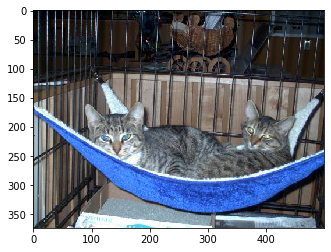

In [39]:
import matplotlib.pyplot as plt
plt.imshow(image.load_img('dataset/single_prediction/cat_or_dog_3.jpg'))

In [40]:
print(prediction)

cat
